# Unit 5 - Financial Planning

In [54]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [55]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [56]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [58]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
eth_price = requests.get(eth_url).json()


# Compute current value of my crpto
my_btc_value = my_btc*btc_price['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth*eth_price['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31795.20
The current value of your 5.3 ETH is $8620.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [59]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [60]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [61]:
# Format current date as ISO format
today = pd.Timestamp("2023-08-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Reorganize the DataFrame
# Separate ticker data
spy_closing = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
agg_closing = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([spy_closing, agg_closing], axis=1, keys=['SPY', 'AGG'])

# Preview DataFrame
df_portfolio


SPY                                    \
                             open    high      low  close    volume   
timestamp                                                             
2023-08-18 04:00:00+00:00  433.37  437.57  433.025  436.5  97179889   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2023-08-18 04:00:00+00:00      630060  435.575282  95.47  95.7475  95.43   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-08-18 04:00:00+00:00  95.62  6020802       22573  95.641505

In [62]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.62
Current SPY closing price: $436.5


In [63]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21825.00
The current value of your 200 AGG shares is $19124.00


### Savings Health Analysis

In [64]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Add Assets together
crypto_assets = my_btc_value + my_eth_value
shares_assets = my_spy_value + my_agg_value

value_data = {
    'Amount': [crypto_assets, shares_assets],
    'Asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('Asset')

# Display savings DataFrame
display(df_savings)

,Amount
Asset,
crypto,40415.756
shares,40949.000


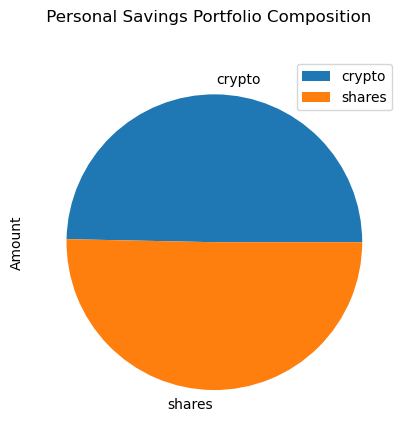

In [65]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(subplots=True, title=" Personal Savings Portfolio Composition")

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
##total_savings = df_savings.loc["crypto"]["Amount"] + df_savings.loc["shares"]["Amount"]
total_savings = df_savings['Amount'].sum()

# Validate saving health

# If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

# If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif (total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal!")

# If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    dollars_away = emergency_fund - total_savings
    print(f"You are ${dollars_away} away from reaching your emergency fund goal. Keep Saving!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [75]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [79]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_yr_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_five_yr_data = df_five_yr_stock_data[df_five_yr_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
agg_five_yr_data = df_five_yr_stock_data[df_five_yr_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_five_yr_stock_data = pd.concat([spy_five_yr_data, agg_five_yr_data], axis=1, keys=['SPY', 'AGG'])

# Display sample data
df_five_yr_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [122]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MCS_30 = MCSimulation(
    portfolio_data = df_five_yr_stock_data,
    weights=[0.6, 0.4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [123]:
# Printing the simulation input data
MCS_30.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [124]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MCS_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 110.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 120.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 130.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 140.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 150.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 160.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 170.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 180.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 190.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 200.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 210.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 220.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 230.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 240.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 250.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 260.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 270.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 280.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 290.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 300.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 310.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 320.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 330.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 340.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 350.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 360.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 370.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 380.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 390.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 400.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 410.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 420.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 430.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 440.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 450.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 460.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 470.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 480.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 490.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000665,0.999470,1.006291,0.987126,1.012594,0.999567,1.005170,0.979987,0.999169,0.998900,...,1.001642,0.989045,0.985203,0.989149,1.006943,1.002962,1.006583,0.988671,0.987545,0.995729
2,1.000404,0.994826,0.992758,0.990629,1.007636,0.999276,1.008018,0.971940,1.005063,0.999298,...,1.000412,1.005168,0.985316,0.985877,1.010499,0.998989,1.000714,0.991265,0.993387,1.005160
3,0.991218,0.995006,0.993467,0.987103,0.991184,1.006955,1.023724,0.960229,0.996073,0.996129,...,0.992578,1.018905,0.986769,0.985911,1.004685,1.001529,0.983431,0.983760,0.982305,1.004753
4,1.005015,0.991280,1.008150,0.986460,1.000586,0.996471,1.024168,0.953910,1.002184,1.001463,...,0.989631,1.019096,0.986204,0.981337,1.010756,1.000010,0.981698,0.986839,0.971429,1.001236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,66.402622,11.868561,27.373973,14.617315,7.929880,12.324509,25.114382,14.764373,10.221997,25.589986,...,21.952071,11.415665,10.141520,15.408200,15.086816,35.961154,8.707310,26.103159,5.819118,10.034430
7557,66.096361,11.854022,27.493971,14.711084,7.899432,12.452233,24.825394,14.883010,10.265034,25.538081,...,22.023146,11.440108,10.154544,15.478111,15.082995,35.665688,8.720914,26.082373,5.813967,10.090708
7558,66.370790,11.884938,27.493039,14.593688,8.001430,12.298142,24.926312,15.056734,10.287269,25.473280,...,22.162492,11.261381,10.150174,15.391672,15.107307,36.081930,8.735977,26.159702,5.829152,10.013832
7559,66.613979,11.906376,27.480141,14.741826,8.043665,12.209518,24.920629,15.004240,10.319619,25.546630,...,22.229945,11.306560,10.194236,15.225283,15.010454,36.303217,8.757830,26.247675,5.844243,10.018980


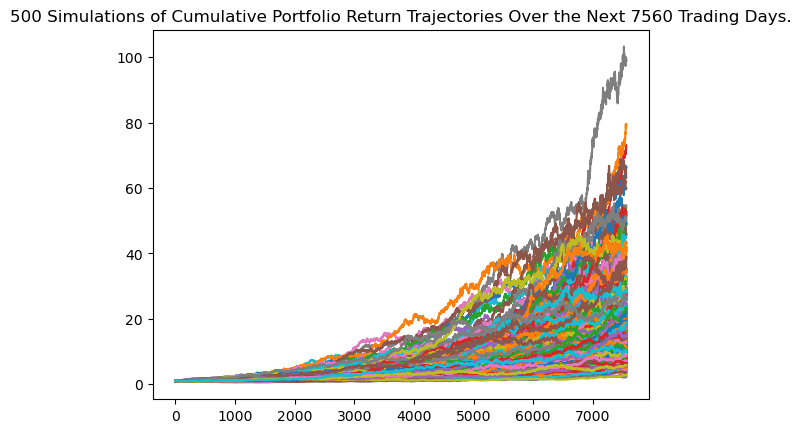

In [125]:
# Plot simulation outcomes
line_plot = MCS_30.plot_simulation()

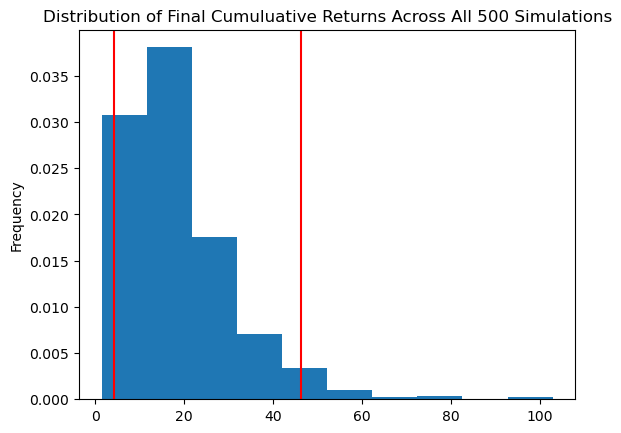

In [92]:
# Plot probability distribution and confidence intervals
dist_plot = MCS_30.plot_distribution()

### Retirement Analysis

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_summary = MCS_30.summarize_cumulative_return()

# Print summary statistics
print(MCS_summary)

count           500.000000
mean             18.728719
std              12.102585
min               1.428161
25%              10.706977
50%              15.702736
75%              23.984162
max             102.786952
95% CI Lower      4.231926
95% CI Upper     46.206308
Name: 7560, dtype: float64


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [104]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MCS_summary[8]*initial_investment, 2)
ci_upper = round(MCS_summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84638.52 and $924126.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [105]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MCS_summary[8]*initial_investment, 2)
ci_upper = round(MCS_summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $126957.78 and $1386189.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MCS_5 = MCSimulation(
    portfolio_data = df_five_yr_stock_data,
    weights=[0.5, 0.5],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [107]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MCS_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015521,1.002775,1.006288,1.003783,0.997565,1.008334,0.994145,0.996084,1.002642,0.998838,...,0.989976,1.003740,0.995776,0.999872,1.009441,1.007256,0.992594,0.994781,0.995925,0.992252
2,1.018204,1.005226,0.995682,1.010512,1.002916,1.009040,1.000116,0.991163,1.002467,1.000188,...,0.989036,1.008975,1.002069,0.991596,1.021341,0.999174,0.986779,0.998233,0.995534,0.984478
3,1.043672,1.004893,0.985091,1.011923,0.992425,1.006861,0.991646,0.976187,0.998130,0.998247,...,0.987855,1.011218,1.002905,0.995087,1.019272,0.995700,0.985187,0.999648,0.996088,0.984898
4,1.044520,1.001363,0.981173,1.018589,0.988882,1.006240,0.979152,0.975760,0.996018,1.004649,...,0.990736,1.018412,1.001832,0.990358,1.019214,0.990678,0.990655,1.001481,0.999761,0.978769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.644233,1.553245,1.281501,1.444422,1.529636,2.094899,1.450538,1.180345,1.965451,1.674299,...,1.276262,1.630031,1.267469,1.240494,1.497109,1.766499,1.702756,1.313052,1.583691,1.927518
1257,1.635356,1.542783,1.285688,1.447159,1.537452,2.080820,1.460728,1.173652,1.957541,1.680032,...,1.273944,1.607871,1.266526,1.242194,1.505902,1.771720,1.688351,1.312744,1.565641,1.923808
1258,1.638547,1.522560,1.273828,1.448794,1.544534,2.106419,1.452418,1.173171,1.957221,1.683680,...,1.280489,1.595413,1.262765,1.236000,1.505676,1.770402,1.696770,1.310546,1.567661,1.910900
1259,1.649328,1.511085,1.287679,1.443773,1.557982,2.093010,1.441347,1.158414,1.952232,1.681180,...,1.282925,1.599115,1.263432,1.228990,1.519053,1.771044,1.695898,1.316714,1.570762,1.920134


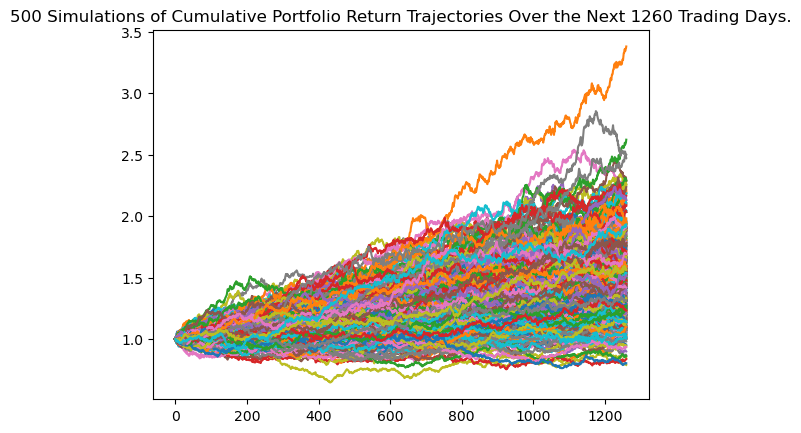

In [108]:
# Plot simulation outcomes
line_plot = MCS_5.plot_simulation()

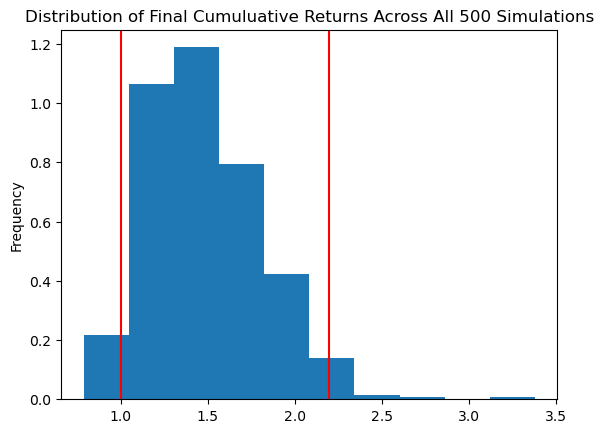

In [109]:
# Plot probability distribution and confidence intervals
dist_plot = MCS_5.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_5_summary = MCS_5.summarize_cumulative_return()

# Print summary statistics
MCS_5_summary

/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.488453
std               0.323061
min               0.788693
25%               1.249121
50%               1.471804
75%               1.666341
max               3.381182
95% CI Lower      1.000625
95% CI Upper      2.197798
Name: 1260, dtype: float64

In [115]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MCS_5_summary[8]*initial_investment_2, 2)
ci_upper_five = round(MCS_5_summary[9]*initial_investment_2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60037.51 and $131867.9


### Ten Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MCS_10 = MCSimulation(
    portfolio_data = df_five_yr_stock_data,
    weights=[0.8, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [117]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MCS_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 110.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 120.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 130.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 140.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 150.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 160.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 170.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 180.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 190.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 200.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 210.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 220.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 230.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 240.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 250.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 260.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 270.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 280.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 290.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 300.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 310.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 320.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 330.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 340.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 350.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 360.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 370.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 380.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 390.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 400.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 410.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 420.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 430.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 440.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 450.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 460.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 470.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 480.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

Running Monte Carlo simulation number 490.


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Use

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992635,0.998342,0.992494,1.002130,0.995647,0.987508,1.013311,1.019896,0.999148,0.993799,...,1.005748,0.997109,0.995221,1.002711,1.013606,1.007279,0.993849,0.998430,0.995084,0.988352
2,1.000919,1.002284,0.985495,1.011695,0.996769,0.995041,1.009826,1.018873,0.995449,1.004043,...,1.005667,1.006401,0.991939,0.989008,1.009086,1.001350,0.983619,0.995785,1.001203,0.998148
3,1.001952,0.995307,0.997320,1.009120,1.009259,0.985731,0.995844,1.015770,0.979724,1.014405,...,1.004138,1.009911,1.000442,0.991020,0.991133,1.017332,0.981322,0.997018,0.989984,1.000264
4,1.013636,0.995359,1.003543,1.007730,0.996625,0.997073,1.003066,1.022814,0.966972,1.021456,...,0.997372,1.006992,0.991206,0.986519,0.990682,1.028535,0.974450,0.977308,0.995352,1.010579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.366174,5.431083,3.748816,5.998286,3.786263,3.913478,3.559978,2.133991,2.164472,4.304870,...,2.352960,4.269405,3.383502,3.603272,1.822435,1.535409,5.968047,2.188285,2.914640,1.452265
2517,2.393932,5.426516,3.732671,6.018536,3.708575,3.880606,3.551774,2.129145,2.188118,4.303741,...,2.351640,4.197237,3.404705,3.569055,1.834490,1.536108,6.089323,2.191339,2.918730,1.476137
2518,2.418488,5.411773,3.785890,6.113948,3.674059,3.888635,3.587623,2.096394,2.162484,4.343476,...,2.312585,4.158220,3.420535,3.615528,1.823710,1.529160,6.018920,2.204905,2.916837,1.449150
2519,2.420650,5.437850,3.840210,6.042476,3.674223,3.939517,3.574505,2.115065,2.143080,4.332694,...,2.312287,4.125046,3.439393,3.600110,1.824148,1.501715,6.038807,2.165310,2.921399,1.446105


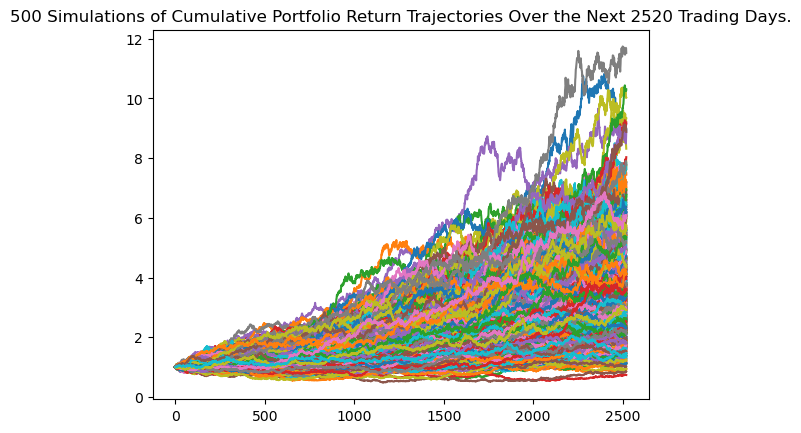

In [118]:
# Plot simulation outcomes
line_plot = MCS_10.plot_simulation()

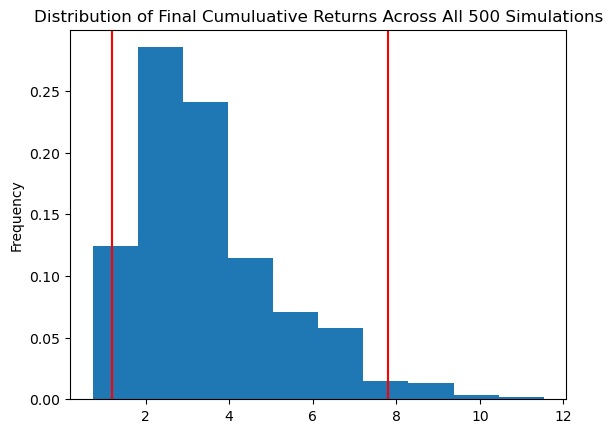

In [119]:
# Plot probability distribution and confidence intervals
dist_plot = MCS_10.plot_distribution()

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_10_summary =  MCS_10.summarize_cumulative_return()

# Print summary statistics
print(MCS_10_summary)

count           500.000000
mean              3.497235
std               1.756217
min               0.736957
25%               2.230890
50%               3.087598
75%               4.290170
max              11.529938
95% CI Lower      1.199279
95% CI Upper      7.798769
Name: 2520, dtype: float64


/Users/bryantbeckford/Downloads/Columbia_Projects/Bryant - Temp (Class Repo) GitHub/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [121]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MCS_10_summary[8]*initial_investment, 2)
ci_upper_ten = round(MCS_10_summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71956.71 and $467926.16
